# Using DBSCAN as clustering method

In [14]:
import numpy as np
import pandas as pd
import re
from sklearn import preprocessing
from scipy.sparse import csr_matrix
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt

## Test

In [77]:
states = ["INITIAL","login","View_Items","home","logout","View_Items_quantity","Add_to_Cart","shoppingcart",
          "remove","deferorder","purchasecart","inventory","sellinventory","clearcart","cancelorder"]
sessions = {'HZKS0-WG8pZr0eCsZlBAP5Xm': ['INITIAL','login',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'home',
   'logout','$']}

### Makovchain & sparse matrix

In [169]:
def transition_matrix(sessions, states):
    markovchains = []
    for key, value in sessions.items():
        # labelEncoding
        le = preprocessing.LabelEncoder()
        le.fit(value)
        transformed_s = le.transform(value)
        
        #factorize
        factorize = pd.factorize(value)[0]
        
        # matrix
        n = 1 + max(factorize)  # number of states
        M = [[0] * n for _ in range(n)]

        for (i, j) in zip(factorize, factorize[1:]):
            M[i][j] += 1
        
        # now convert to probabilities:
        for row in M:
            s = sum(row)
            if s > 0:
                row[:] = [f / s for f in row]
                
        # print Matrix style
        #for row in M: print(' '.join('{0:.2f}'.format(x) for x in row))
        
        # unique array in the right order
        value = np.array(value)
        _, idx = np.unique(value, return_index=True)
        
        df = pd.DataFrame(data = M, index=value[np.sort(idx)],
                          columns=value[np.sort(idx)])
        #print(df)
        df_1 = pd.DataFrame(index=states, columns=states, dtype='float64')
        #print(df_1)
        #merge = df_1.merge(df, how='outer').fillna(0).round(2).set_index(value[np.sort(idx)])
        
        merge = pd.concat([pd.concat([df_1, df], axis=1, sort= False)], axis=0).fillna(0).round(2)
        #print(merge)
        join = pd.concat([df_1, df], axis=1, sort= False).fillna(0).round(2)
        
        #print(join)
        #print(merge)
        
        """
        # convert into Vector
        merge = np.array(merge.values.flatten().tolist())
        print(len(merge))
        # resize so the vectors got the same length
        size = 16*16
        merge.resize(size)
        
        # 2-D array 
        markovchains.append(merge)
        
        
        # csr sparse matrix
        merge = csr_matrix(merge)
        #print(merge)
        markovchains.append(merge)
        """
    #print(len(merge))
    return cols_to_use

m = transition_matrix(sessions, states)
m

Index([], dtype='object')

In [63]:
X = m
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
labels = clustering.labels_
print(labels)
print(clustering)

[ 0 -1  0  0]
DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)


## DBSCAN
Testing DBSCAN with random data.

In [49]:
X = np.arange(100).reshape(20,5)
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
labels = clustering.labels_
print(labels)
print(clustering)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)


In [50]:
X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])
print(X)
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
labels = clustering.labels_
print(clustering.labels_)

clustering 

[[ 1  2]
 [ 2  2]
 [ 2  3]
 [ 8  7]
 [ 8  8]
 [25 80]]
[ 0  0  0  1  1 -1]


DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)

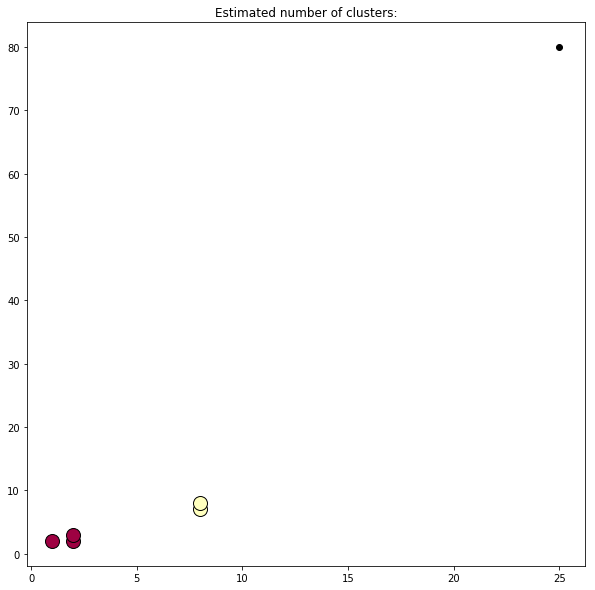

In [51]:
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[clustering.core_sample_indices_] = True

unique_labels = set(labels)
plt.figure(figsize=(10, 10))
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters:')
plt.show()

In [185]:
df1 = pd.DataFrame({'a':[0,0,0,0,0,0],
                    'b':[0,0,0,0,0,0], 'c':[0,0,0,0,0,0]}, index=list('abcdef'))

print (df1)


df2 = pd.DataFrame({'a':range(4),
                    'b':[5,6,7,8]}, index=list('abce'))

print (df2)



   a  b  c
a  0  0  0
b  0  0  0
c  0  0  0
d  0  0  0
e  0  0  0
f  0  0  0
   a  b
a  0  5
b  1  6
c  2  7
e  3  8
